In [1]:
pip install ucimlrepo


Note: you may need to restart the kernel to use updated packages.


In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

Accuracy: 0.8694337953406075
Confusion Matrix:
[[11057   909]
 [  862   736]]
Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.92      0.93     11966
        True       0.45      0.46      0.45      1598

    accuracy                           0.87     13564
   macro avg       0.69      0.69      0.69     13564
weighted avg       0.87      0.87      0.87     13564



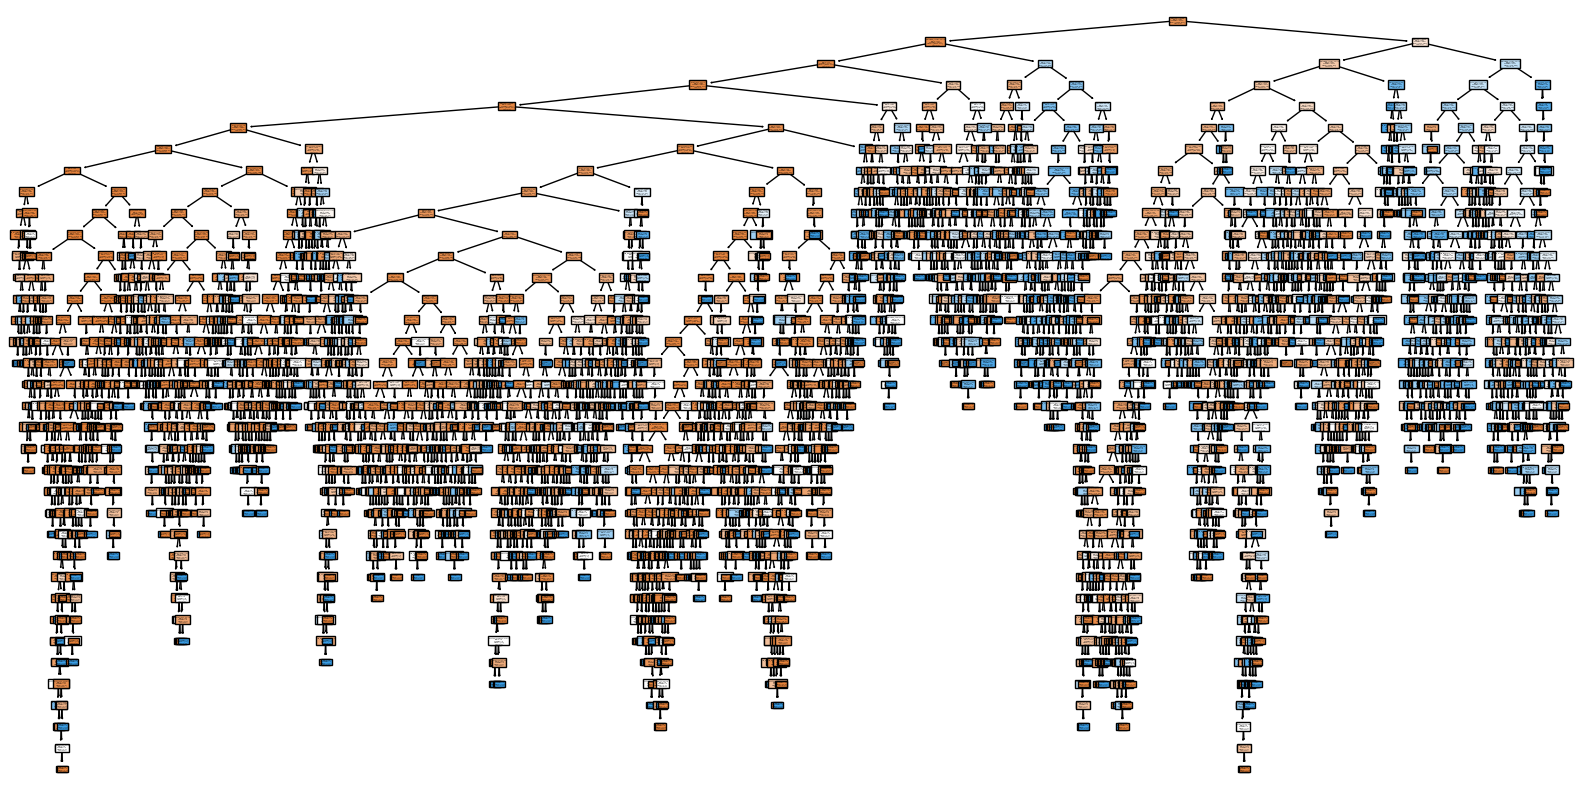

In [2]:
# Import necessary libraries for preprocessing and model training
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Combine X and y into a single DataFrame for convenience
data = pd.concat([X, y], axis=1)

# Convert categorical variables to dummy variables (one-hot encoding)
data_encoded = pd.get_dummies(data, drop_first=True)

# Define features (X) and target (y)
X_encoded = data_encoded.drop('y_yes', axis=1)
y_encoded = data_encoded['y_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# Create and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# Optional: Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X_encoded.columns, class_names=['No', 'Yes'], filled=True)
plt.show()
